In [5]:
%matplotlib inline

import sys
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cross_validation import train_test_split

root_path = '/Users/irina/src/ud120-projects'
sys.path.append("{}/tools/".format(root_path))

from feature_format import featureFormat, targetFeatureSplit

with open("{}/final_project/final_project_dataset.pkl".format(root_path), "r") as data_file:
    data_dict = pickle.load(data_file)

outlier = data_dict.pop('TOTAL', 0)

# There are 2 records with incorrect values in them (do not match the PDF).
# Fix them here.
data_dict['BELFER ROBERT'] = {
    'bonus': 'NaN',
    'deferral_payments': 'NaN',
    'deferred_income': -102500,
    'director_fees': 102500,
    'email_address': 'NaN',
    'exercised_stock_options': 'NaN',
    'expenses': 3285,
    'from_messages': 'NaN',
    'from_poi_to_this_person': 'NaN',
    'from_this_person_to_poi': 'NaN',
    'loan_advances': 'NaN',
    'long_term_incentive': 'NaN',
    'other': 'NaN',
    'poi': False,
    'restricted_stock': -44093,
    'restricted_stock_deferred': 44093,
    'salary': 'NaN',
    'shared_receipt_with_poi': 'NaN',
    'to_messages': 'NaN',
    'total_payments': 3285,
    'total_stock_value': 'NaN'
}

data_dict['BHATNAGAR SANJAY'] = {
    'bonus': 'NaN',
    'deferral_payments': 'NaN',
    'deferred_income': 'NaN',
    'director_fees': 'NaN',
    'email_address': 'sanjay.bhatnagar@enron.com',
    'exercised_stock_options': 15456290,
    'expenses': 137864,
    'from_messages': 29,
    'from_poi_to_this_person': 0,
    'from_this_person_to_poi': 1,
    'loan_advances': 'NaN',
    'long_term_incentive': 'NaN',
    'other': 'NaN',
    'poi': False,
    'restricted_stock': 2604490,
    'restricted_stock_deferred': -2604490,
    'salary': 'NaN',
    'shared_receipt_with_poi': 463,
    'to_messages': 523,
    'total_payments': 137864,
    'total_stock_value': 15456290
}


In [6]:
df = pd.DataFrame.from_dict(data_dict, orient='index')


In [19]:
df = df.replace('NaN', np.nan)

# There is one record with all values NaN
df = df.dropna(how='all')

colors = {True: 'red', False: 'blue'}

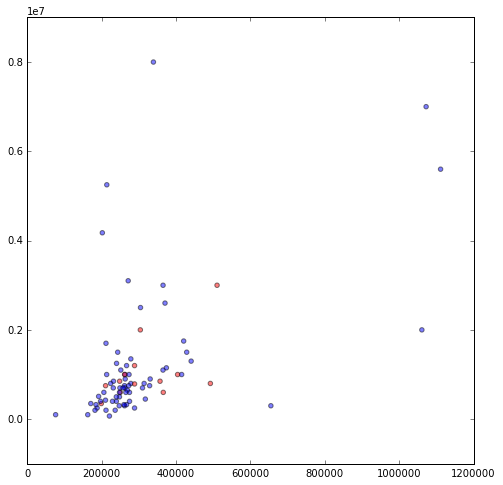

In [20]:
fig = plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(df['salary'], 
            df['bonus'],
            alpha=0.5,
            c=df['poi'].apply(lambda x: colors[x]))
plt.show()

In [17]:
for cname in df.columns.values.tolist():
    print df[cname].describe(), "\n"


count         94.000000
mean      284087.542553
std       177131.115377
min          477.000000
25%       211802.000000
50%       258741.000000
75%       308606.500000
max      1111258.000000
Name: salary, dtype: float64 

count       86.000000
mean      2073.860465
std       2582.700981
min         57.000000
25%        541.250000
50%       1211.000000
75%       2634.750000
max      15149.000000
Name: to_messages, dtype: float64 

count         37.000000
mean      867118.810811
std      1297343.817438
min         7961.000000
25%        85430.000000
50%       227449.000000
75%       875307.000000
max      6426990.000000
Name: deferral_payments, dtype: float64 

count    1.240000e+02
mean     2.499085e+06
std      9.419345e+06
min      1.480000e+02
25%      3.616470e+05
50%      1.095882e+06
75%      2.056144e+06
max      1.035598e+08
Name: total_payments, dtype: float64 

count         100.000000
mean      3117640.000000
std       5657923.990781
min          9803.000000
25%        57012

 

count         145
mean     0.124138
std      0.330882
min         False
25%             0
50%             0
75%             0
max          True
Name: poi, dtype: object 

count        15.000000
mean      93234.466667
std       33320.075521
min       17500.000000
25%      100017.000000
50%      103750.000000
75%      110895.000000
max      125034.000000
Name: director_fees, dtype: float64 

count         49.000000
mean     -571283.489796
std       934714.861333
min     -3504386.000000
25%      -583325.000000
50%      -144062.000000
75%       -38346.000000
max         -833.000000
Name: deferred_income, dtype: float64 

count         65.000000
mean      746491.200000
std       862917.421568
min        69223.000000
25%       275000.000000
50%       422158.000000
75%       831809.000000
max      5145434.000000
Name: long_term_incentive, dtype: float64 

count                         111
unique                        111
top       danny.mccarty@enron.com
freq                            1


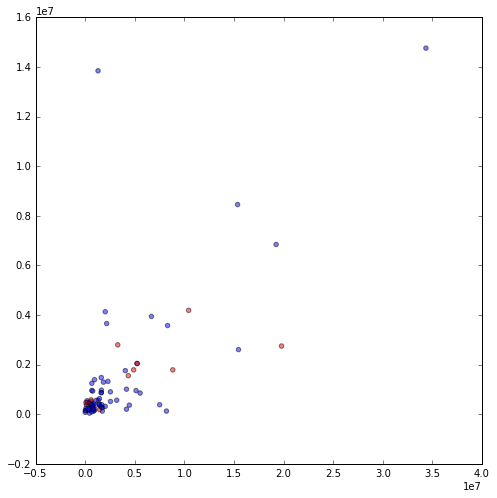

In [18]:
fig = plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(df['exercised_stock_options'], 
            df['restricted_stock'],
            alpha=0.5,
            c=df['poi'].apply(lambda x: colors[x]))
plt.show()

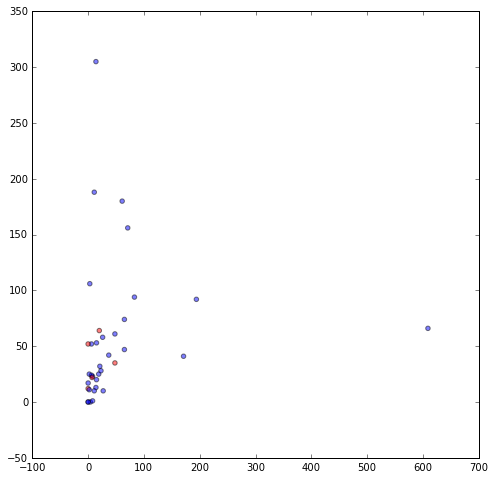

In [13]:
# letters to and from poi
fig = plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(dfc['from_this_person_to_poi'], 
            dfc['from_poi_to_this_person'],
            alpha=0.5,
            c=dfc['poi'].apply(lambda x: colors[x]))
plt.show()

In [28]:
dfc = df
print 'original frame shape: {}'.format(dfc.shape)
for cname in ['salary']:
    upper = df[cname].quantile(0.99)
    dfc = dfc[dfc[cname] <= upper]
    print 'filtered frame shape: {} : {}'.format(cname, dfc.shape)

original frame shape: (144, 21)
filtered frame shape: salary : (93, 21)


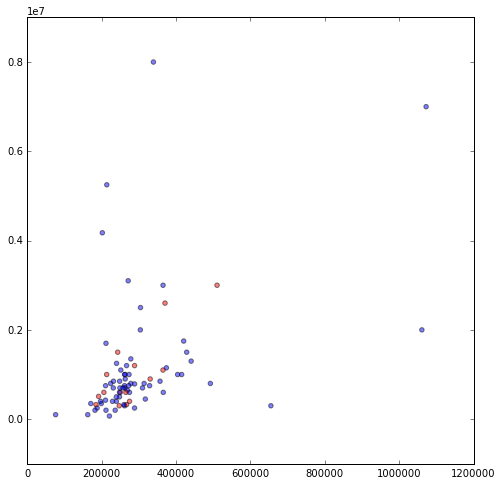

In [29]:
# salary without outliers
fig = plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(dfc['salary'], 
            dfc['bonus'],
            alpha=0.5,
            c=dfc['poi'].apply(lambda x: colors[x]))
plt.show()

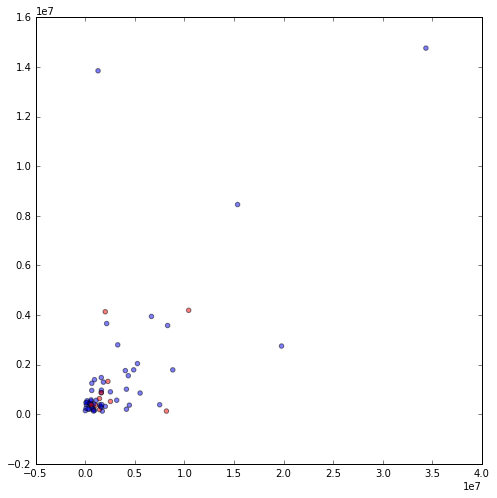

In [30]:
# stocks without outliers
fig = plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(dfc['exercised_stock_options'], 
            dfc['restricted_stock'],
            alpha=0.5,
            c=dfc['poi'].apply(lambda x: colors[x]))
plt.show()

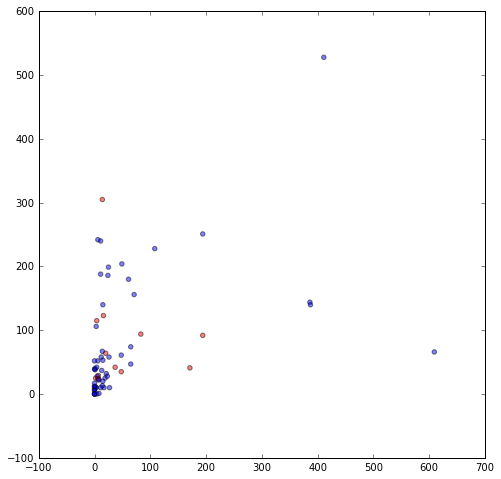

In [31]:
# letters to and from poi without ouliers
fig = plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(dfc['from_this_person_to_poi'], 
            dfc['from_poi_to_this_person'],
            alpha=0.5,
            c=dfc['poi'].apply(lambda x: colors[x]))
plt.show()